In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [24]:
a = int(2251262573%7+1)
print(a)

1


In [25]:
train_df = train_df.loc[(train_df['Publication_Day']=='Monday')]
train_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
8,8,Daily Digest,Episode 32,105.87,News,69.81,Monday,Evening,NaN,2.0,Neutral,68.00124
11,11,Melody Mix,Episode 62,107.26,Music,78.12,Monday,Evening,78.12,1.0,Positive,103.56000
24,24,Sports Central,Episode 36,79.50,Sports,59.96,Monday,Evening,15.72,0.0,Neutral,54.52628


In [26]:
from filterpy.kalman import KalmanFilter

In [27]:
observations = train_df["Listening_Time_minutes"].values

observations = observations[~np.isnan(observations)]

kf = KalmanFilter(dim_x=2, dim_z=1)

kf.x = np.array([[observations[0]], [0]])        
kf.F = np.array([[1, 1],
                 [0, 1]])                        
kf.H = np.array([[1, 0]])                        
kf.P *= 1000                                     
kf.R = 10                                        
kf.Q = np.array([[1, 0],
                 [0, 1]]) * 0.01                

filtered = []
for z in observations:
    kf.predict()
    kf.update(z)
    filtered.append(kf.x[0, 0]) 

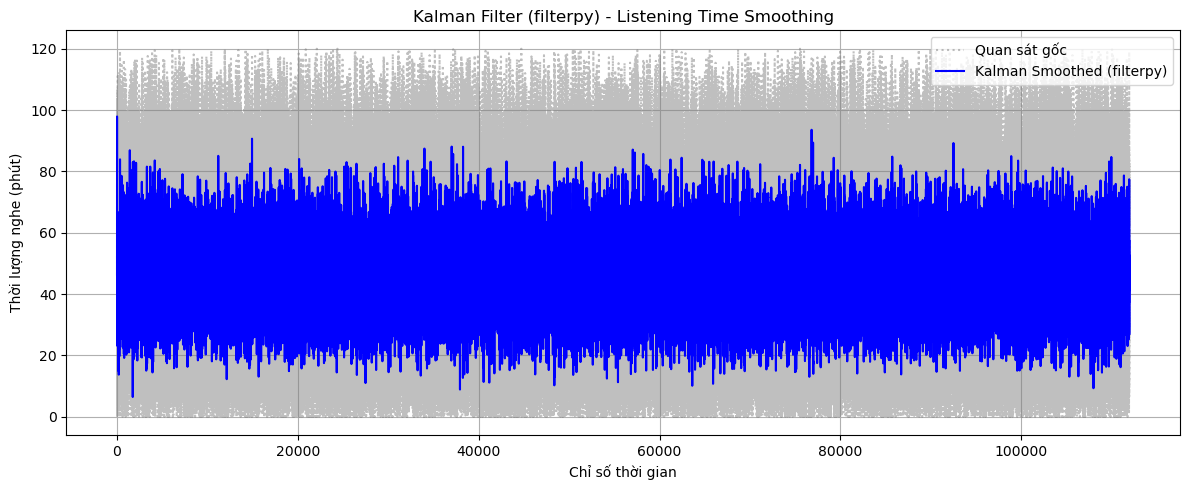

In [28]:
plt.figure(figsize=(12, 5))
plt.plot(observations, label='Quan sát gốc', linestyle='dotted', color='gray', alpha=0.5)
plt.plot(filtered, label='Kalman Smoothed (filterpy)', color='blue')
plt.title("Kalman Filter (filterpy) - Listening Time Smoothing")
plt.xlabel("Chỉ số thời gian")
plt.ylabel("Thời lượng nghe (phút)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
from filterpy.kalman import MerweScaledSigmaPoints
from filterpy.kalman import UnscentedKalmanFilter as UKF

In [36]:
def fx(x, dt):
    return x

def hx(x):
    return x

points = MerweScaledSigmaPoints(n=1, alpha=0.1, beta=2.0, kappa=1.0)

ukf = UKF(dim_x=1, dim_z=1, fx=fx, hx=hx, dt=1.0, points=points)

ukf.x = np.array([observations[0]])  
ukf.P *= 10                         
ukf.R *= 5                         
ukf.Q *= 0.01                        

filtered = []
for z in observations:
    ukf.predict()
    ukf.update(z)
    filtered.append(ukf.x[0])

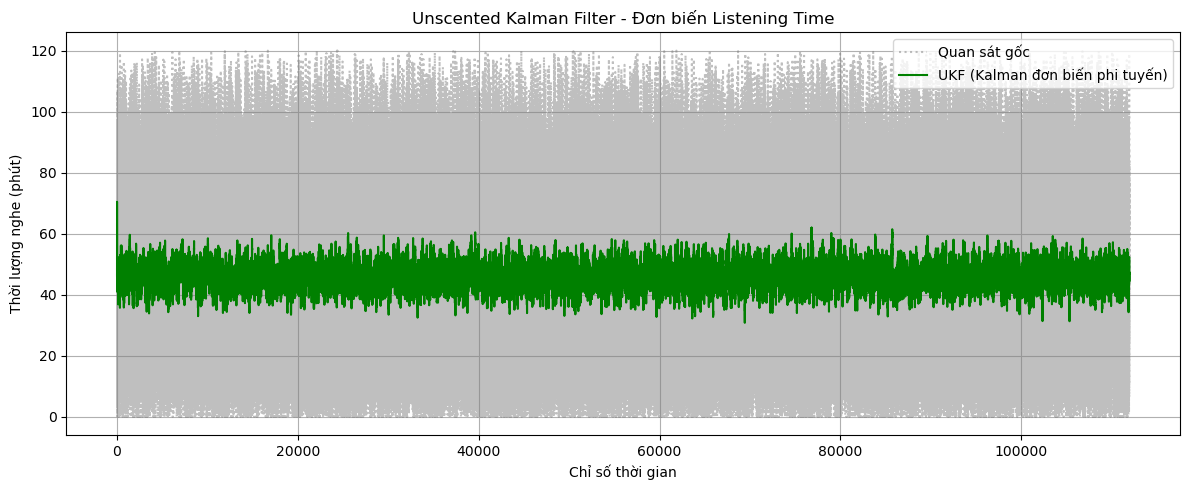

In [37]:
plt.figure(figsize=(12, 5))
plt.plot(observations, label="Quan sát gốc", linestyle="dotted", color="gray", alpha=0.5)
plt.plot(filtered, label="UKF (Kalman đơn biến phi tuyến)", color="green")
plt.title("Unscented Kalman Filter - Đơn biến Listening Time")
plt.xlabel("Chỉ số thời gian")
plt.ylabel("Thời lượng nghe (phút)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
from pykalman import KalmanFilter

In [48]:
kf = KalmanFilter(
    transition_matrices=[[1]],
    observation_matrices=[[1]],
    initial_state_mean=observations[0],
    initial_state_covariance=1,
    observation_covariance=10,
    transition_covariance=0.01
)

smoothed_state_mean, smoothed_state_cov = kf.smooth(observations)

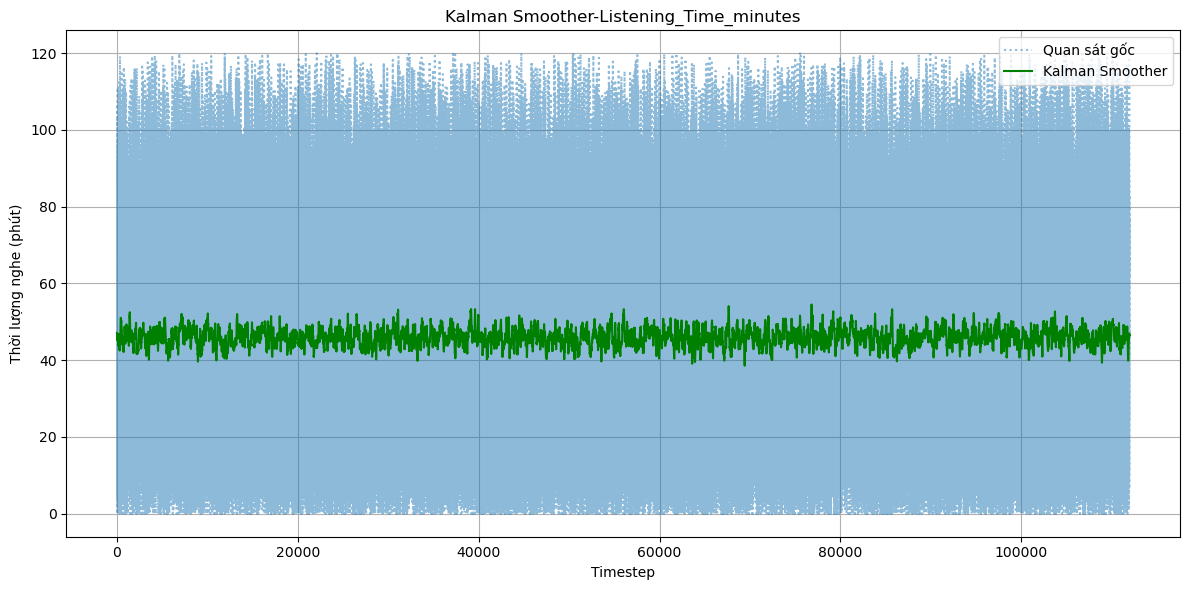

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(observations, label="Quan sát gốc", linestyle="dotted", alpha=0.5)
plt.plot(smoothed_state_mean, label="Kalman Smoother", color="green")
plt.title("Kalman Smoother-Listening_Time_minutes")
plt.xlabel("Timestep")
plt.ylabel("Thời lượng nghe (phút)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()